# OASIS INFOBYTE INTERNSHIP

## NAME :- HARSHAWARDHAN CHITNIS 
## POSITION :- Data Science Intern

### TASK : 4
### PROJECT NAME : EMAIL SPAM DETECTION WITH MACHINE LEARNING


### PROBLEM STATEMENT : We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content. In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!



# STARTING WITH THE PROJECT 

## Importing Modules / Libraries 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
dataset = pd.read_csv('SPAM', sep='\t', names=['label', 'text'])

In [3]:
dataset

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.shape

(5572, 2)

In [5]:
!pip install nltk

In [6]:
import nltk

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshawardhanchitnis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
sent = 'Hello friends! How are you?'

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshawardhanchitnis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Hello', 'friends', '!', 'How', 'are', 'you', '?']

In [11]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

In [12]:
clean = [word for word in word_tokenize(sent) if word not in swords]

In [13]:
clean

['Hello', 'friends', '!', 'How', '?']

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent) if word not in swords]

In [15]:
clean

['hello', 'friend', '!', 'how', '?']

In [16]:
sent = 'Hello friends! How are you? We will be learning Python today'

In [17]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in swords]
    return(clean)

In [18]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [19]:
#preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [21]:
x = dataset['text']
y = dataset['label']

In [22]:
x_new=tfidf.fit_transform(x)

In [23]:
x.shape

(5572,)

In [24]:
x_new.shape

(5572, 6513)

In [25]:
x_new

<5572x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 52573 stored elements in Compressed Sparse Row format>

In [26]:
tfidf.get_feature_names()

/Users/harshawardhanchitnis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '050703',
 '0578',
 '06',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07973788240',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '0870',
 '08701213186',
 '08701237397',
 '08701417012',
 '087016248',
 '08701752560',
 '087018728737',
 '0870241182716',
 '08702490080',
 '08702840625',
 '08704439680

In [27]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [28]:
#cross validation
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
x_new, y, random_state=0, test_size=0.25)

In [30]:
x_train.shape

(4179, 6513)

In [31]:
x_test.shape

(1393, 6513)

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb = GaussianNB()

In [34]:
nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [35]:
y_pred=nb.predict(x_test.toarray())

In [36]:
y_test.value_counts()

ham     1208
spam     185
Name: label, dtype: int64

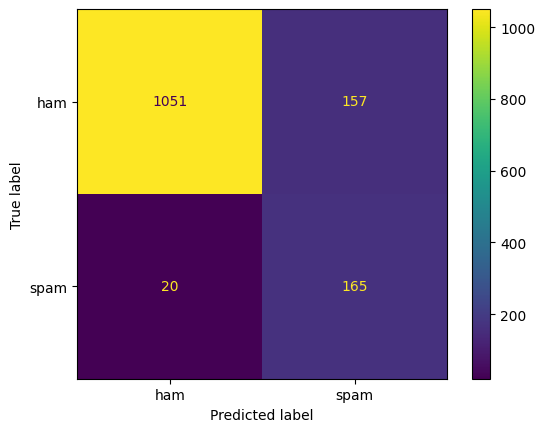

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [40]:
accuracy_score(y_test, y_pred)

0.8729361091170137

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(random_state=0)

In [43]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [44]:
y_pred=rf.predict(x_test)

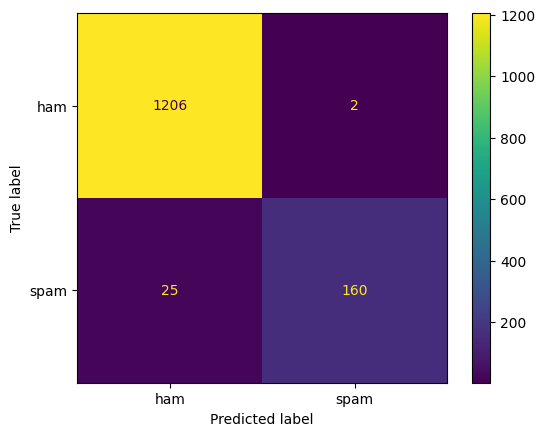

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [47]:
accuracy_score(y_test, y_pred)

0.9806173725771715

In [48]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred=log.predict(x_test)
accuracy_score(y_test, y_pred)

0.9641062455132807

In [49]:
input_mail = input("Enter the text of the email :\n\n")


Enter the text of the email :

Congratulations on being selected as a intern at Oasis Infobyte


In [50]:
def changing(text):

    text = text.lower()

    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [51]:
inp=changing(input_mail)
inp

'congratul on be select as a intern at oasi infobyt'

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
inp_f= tfidf.transform([inp])

In [53]:
prediction = log.predict(inp_f)

In [54]:
if (prediction[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')
     

Non-Spam mail
